In [4]:
import pandas as pd
import random
import numpy as np
import scipy
import scipy.optimize as sco
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import matplotlib.dates as mdates
import datetime as dt

In [5]:
DJSIreturns = pd.read_csv("DJSIreturnsexpanded.csv").dropna(axis = 0)
DJSIquants = np.array(np.array(DJSIreturns)[:,1:], dtype = "float")
DJSInames = np.array(DJSIreturns['Portfolio 2'])


ESGexpreturns = pd.read_csv("AnotherESGone.csv").dropna(axis = 0).drop(32, axis = 0)
ESGexpquants = np.array(np.array(ESGexpreturns)[:,1:], dtype = "float")
ESGnames = np.array(ESGexpreturns['Portfolio 3'])

SPreturns = pd.read_csv("SPreturnsexpanded.csv").dropna(axis = 0)
SPquants = np.array(np.array(SPreturns)[:,1:], dtype = "float")
SPnames = np.array(SPreturns['Portfolio A'])

SPweights = np.genfromtxt("optimal_SPweights.csv", delimiter=',')
DJSIweights = np.genfromtxt("optimal_DJSIweights.csv", delimiter=',')
ESGweights = np.genfromtxt("optimal_ESGweights.csv", delimiter=',')

In [6]:
SPmonthly_returns = np.matmul(SPweights, SPquants)
DJSImonthly_returns = np.matmul(DJSIweights, DJSIquants)
ESGmonthly_returns = np.matmul(ESGweights, ESGexpquants)

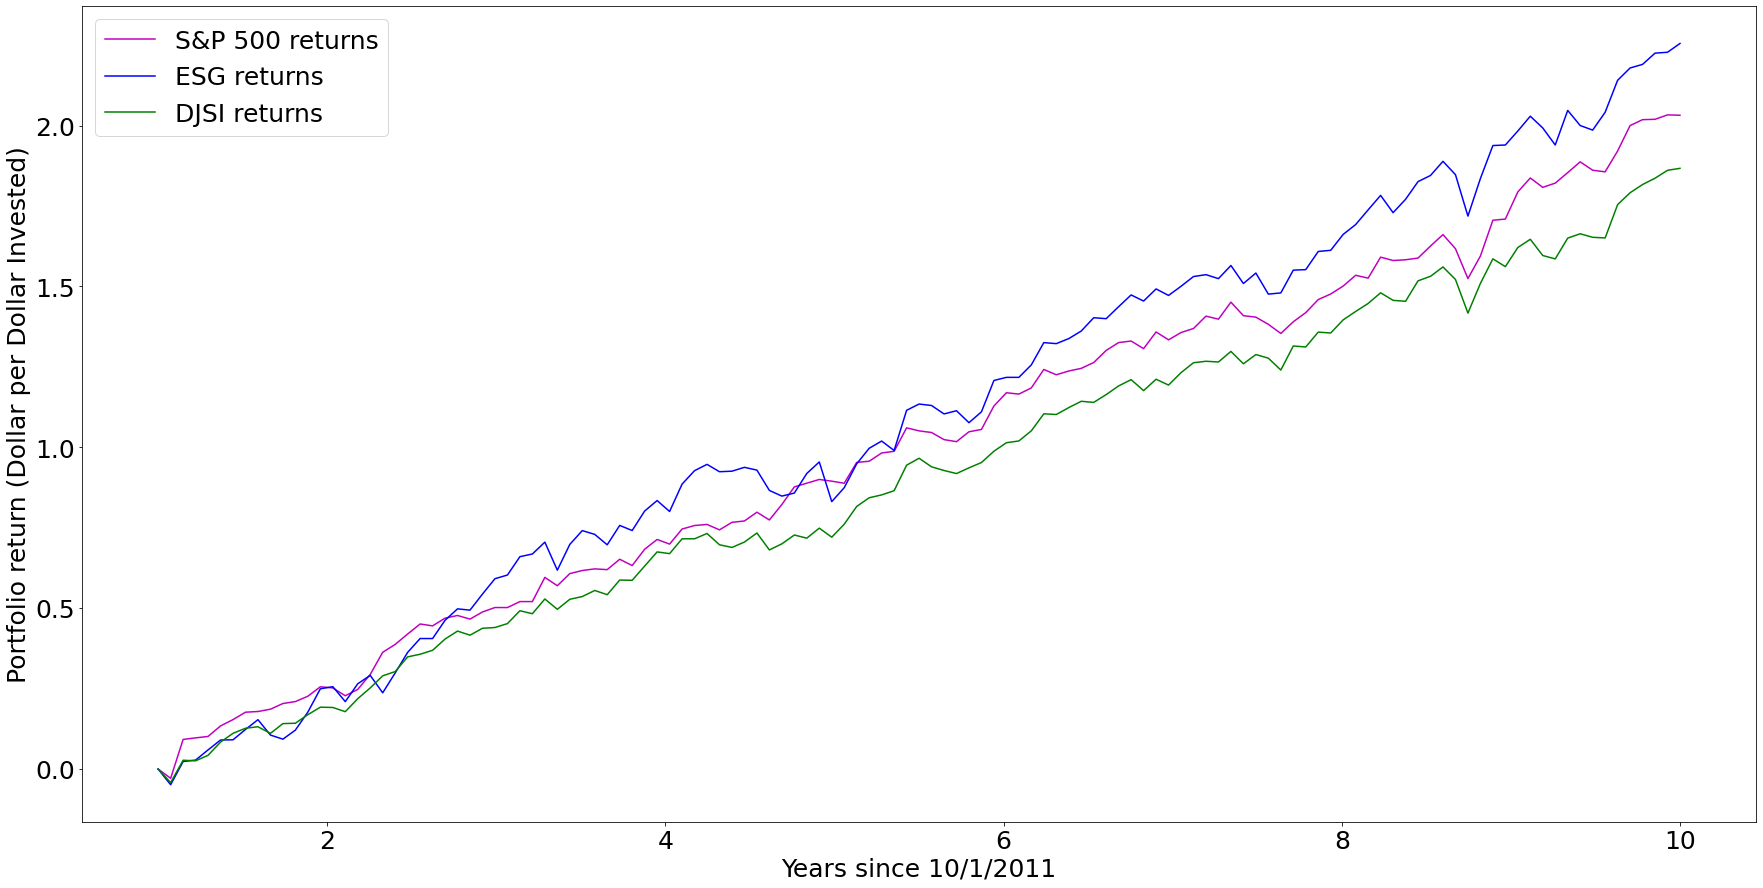

In [8]:
SPcumulative = np.array([np.sum(SPmonthly_returns[:i]) for i in range(len(SPmonthly_returns))])
DJSIcumulative = np.array([np.sum(DJSImonthly_returns[:i]) for i in range(len(DJSImonthly_returns))])
ESGcumulative = np.array([np.sum(ESGmonthly_returns[:i]) for i in range(len(ESGmonthly_returns))])

dates = np.array(DJSIreturns.columns[1:])

x = np.linspace(1, 10, len(SPcumulative))

plt.figure(figsize = (30, 15))
plt.plot(x, SPcumulative, label = "S&P 500 returns", color = 'm')
plt.plot(x, ESGcumulative, label = "ESG returns", color = 'b')
plt.plot(x, DJSIcumulative, label = "DJSI returns", color = 'g')
plt.legend()
plt.xlabel("Years since 10/1/2011")
plt.ylabel("Portfolio return (Dollar per Dollar Invested)")
plt.rc('font', size = 25)
plt.savefig("Backtest.png", dpi = 600)

In [9]:
print(SPcumulative[-1])
print(ESGcumulative[-1])
print(DJSIcumulative[-1])

2.03199178864723
2.255152289014233
1.8670936805042473


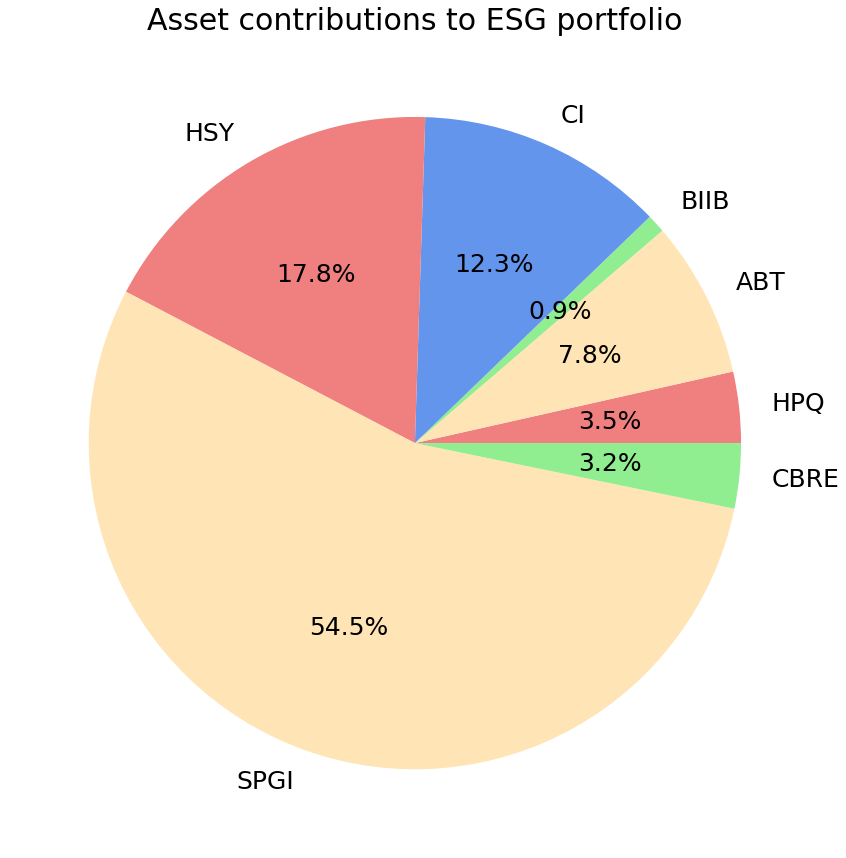

In [143]:
ESGdrivers = np.where(ESGweights > 0.000001)[0]
ESGmainnames = [ESGnames[i] for i in ESGdrivers]
ESGmainweights = [ESGweights[i] for i in ESGdrivers]
colors = ['lightcoral', 'moccasin', 'lightgreen', 'cornflowerblue']

plt.figure(figsize = (20, 15))
plt.pie(ESGmainweights, labels = ESGmainnames, autopct='%1.1f%%', colors = colors)
plt.title("Asset contributions to ESG portfolio")
plt.savefig("ESGassetcontri.png", dpi = 600)
plt.show()

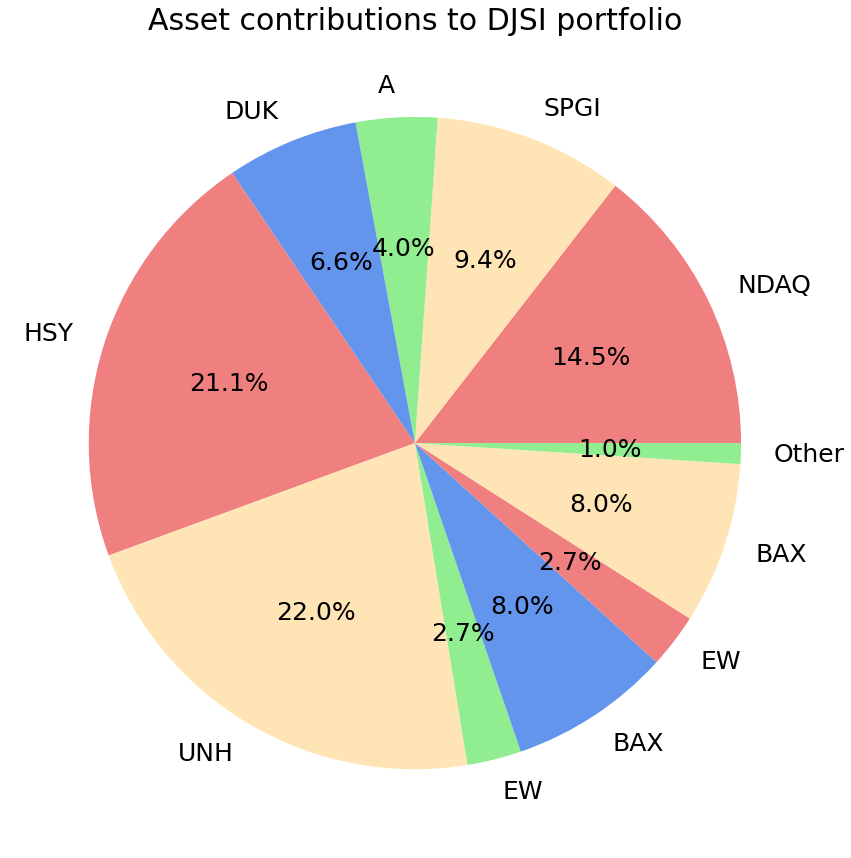

In [13]:
DJSIdrivers = np.where(DJSIweights > 0.000001)[0]
DJSImainnames = [DJSInames[i] for i in DJSIdrivers]
DJSImainweights = [DJSIweights[i] for i in DJSIdrivers]
colors = ['lightcoral', 'moccasin', 'lightgreen', 'cornflowerblue']

others = np.where(np.array(DJSImainweights) < 0.02)[0]
otherweight = sum([DJSImainweights[i] for i in others])

DJSIothers = [i for i in DJSImainweights if i > 0.02]
DJSIothernames = [ DJSImainnames[i] for i in others]
for i in DJSIothernames: 
    DJSImainnames.remove(i)


DJSIothers.append(otherweight)
DJSImainnames.append('Other')



plt.figure(figsize = (20, 15))
plt.pie(DJSIothers, labels = DJSImainnames, autopct='%1.1f%%', colors = colors)
plt.title("Asset contributions to DJSI portfolio")
plt.savefig("DJSIassetcontri.png", dpi = 600)
plt.show()

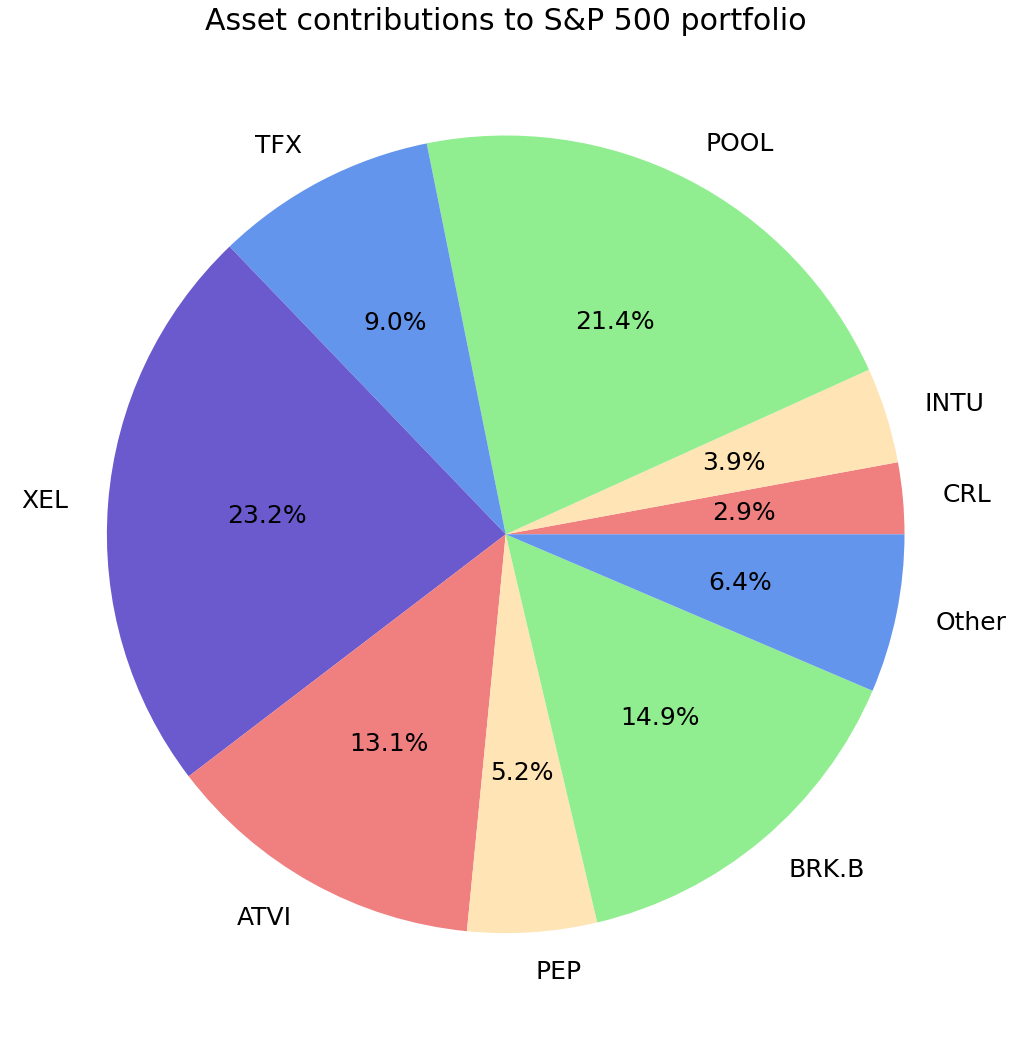

In [15]:
SPdrivers = np.where(SPweights > 0.00001)[0]
SPmainnames = [SPnames[i] for i in SPdrivers]
SPmainweights = [SPweights[i] for i in SPdrivers]

others = np.where(np.array(SPmainweights) < 0.02)[0]
otherweight = sum([SPmainweights[i] for i in others])

SPothers = [i for i in SPmainweights if i > 0.02]
SPothernames = [ SPmainnames[i] for i in others]
for i in SPothernames: 
    SPmainnames.remove(i)


SPothers.append(otherweight)
SPmainnames.append('Other')

colors = ['lightcoral', 'moccasin', 'lightgreen', 'cornflowerblue', 'slateblue']

plt.figure(figsize = (20, 15))
plt.pie(SPothers, labels = SPmainnames, autopct='%1.1f%%', colors = colors)
plt.title("Asset contributions to S&P 500 portfolio")
plt.tight_layout()
plt.savefig("SPassetcontri.png", dpi = 600)
plt.show()